In [1]:
import pandas as pd
import numpy as np
from numpy import unique
from numpy import where
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.cluster import Birch
from sklearn import metrics
import seaborn as sns
import matplotlib.pyplot as plt

df = pd.read_csv('./CS235Project/DF_Outputs/DF_text_processed_V2.csv')
df.head()

,Unnamed: 0,paper_id,doi,abstract,body_text,authors,title,journal,language,processed_abstract,processed_body_text
0,4127,a5d0b34f30d76d6f680291733e307106bd40078d,10.1016/j.antiviral.2013.11.006,The SARS (severe acute respiratory syndrome) p...,Coronaviruses are ubiquitous viruses infecting...,"Subissi, Lorenzo. Imbert, Isabelle. Ferron, ...",SARS-CoV ORF1b-encoded nonstructural proteins ...,Antiviral Research,en,sars severe acute respiratory syndrome pandemi...,coronaviruses ubiquitous virus infect large va...
1,14448,58b03ddec1bad21055ed4ca08df9ad08f9fd650c,10.1016/j.meegid.2014.06.005,"Porcine epidemic diarrhea virus (PEDV), a memb...",Porcine epidemic diarrhea virus (PEDV) is a me...,"Choi, Jong-Chul. Lee, Kun-Kyu. Pi, Jae Ho. ...",Comparative genome analysis and molecular epid...,"Infection, Genetics and Evolution",en,porcine epidemic diarrhea virus pedv member co...,porcine epidemic diarrhea virus pedv member fa...
2,27523,9fae9474725400c9be6f28818e571b7adb3ceba6,10.1007/s12250-011-3194-9,Ebola virus infection causes severe hemorrhagi...,Ebola viruses are enveloped viruses with an ~1...,"Wang, Jizhen. Manicassamy, Balaji. Caffrey, ...",Characterization of the receptor-binding domai...,Virol Sin,en,ebola virus infection cause severe hemorrhagic...,ebola virus envelop virus ~19 kb single-strand...
3,21028,d92e305bcea5be1e84643b9998c81c70ba72b6b4,10.1007/s13364-013-0138-9,Invasive wildlife species have the potential t...,"In recent years, awareness for wildlife diseas...","Sutor, Astrid. Schwarz, Sabine. Conraths, Fr...",The biological potential of the raccoon dog (N...,Acta Theriol (Warsz),en,invasive wildlife species potential act additi...,recent year awareness wildlife disease increas...
4,9678,84564b1c4576582020f42d649003950aaf9f55ca,10.1016/j.jcv.2018.05.006,Background: Influenza (FLUV) and human respira...,Acute respiratory infections (ARI) represent a...,"Gimferrer, Laura. Andrés, Cristina. Rando, A...",Evaluation of Seegene Allplex Respiratory Pane...,Journal of Clinical Virology,en,background influenza fluv human respiratory sy...,acute respiratory infection ari represent majo...


# Data Preprocessing
The columns "abstract" and "body text" combined represent most of data needed for clustering. These columns were processed by removing stop-words and filtering invalid values and combined together to form a new column "text" which is used for clustering.

Later Tfidfvectorizer was used to convert text values into vectors to facilitate clustering.

In [2]:
df['text'] = df['processed_abstract'].str.cat(df['processed_body_text'],sep=" ")
df['text'].replace('', np.nan, inplace=True)
df.dropna(subset=['text'], inplace=True)

data = df['text']

vectorizer = TfidfVectorizer(max_features = 2 ** 10)
X = vectorizer.fit_transform(data.values)
X.shape

(9987, 1024)

# Dimensionality reduction using TSNE

In [12]:
from sklearn.manifold import TSNE

tsne = TSNE(verbose=1, perplexity=100)
X_TSNE = tsne.fit_transform(X.toarray())

[t-SNE] Computing 301 nearest neighbors...
[t-SNE] Indexed 9987 samples in 1.289s...
[t-SNE] Computed neighbors for 9987 samples in 214.361s...
[t-SNE] Computed conditional probabilities for sample 1000 / 9987
[t-SNE] Computed conditional probabilities for sample 2000 / 9987
[t-SNE] Computed conditional probabilities for sample 3000 / 9987
[t-SNE] Computed conditional probabilities for sample 4000 / 9987
[t-SNE] Computed conditional probabilities for sample 5000 / 9987
[t-SNE] Computed conditional probabilities for sample 6000 / 9987
[t-SNE] Computed conditional probabilities for sample 7000 / 9987
[t-SNE] Computed conditional probabilities for sample 8000 / 9987
[t-SNE] Computed conditional probabilities for sample 9000 / 9987
[t-SNE] Computed conditional probabilities for sample 9987 / 9987
[t-SNE] Mean sigma: 0.353378
[t-SNE] KL divergence after 250 iterations with early exaggeration: 80.047333
[t-SNE] KL divergence after 1000 iterations: 1.650338


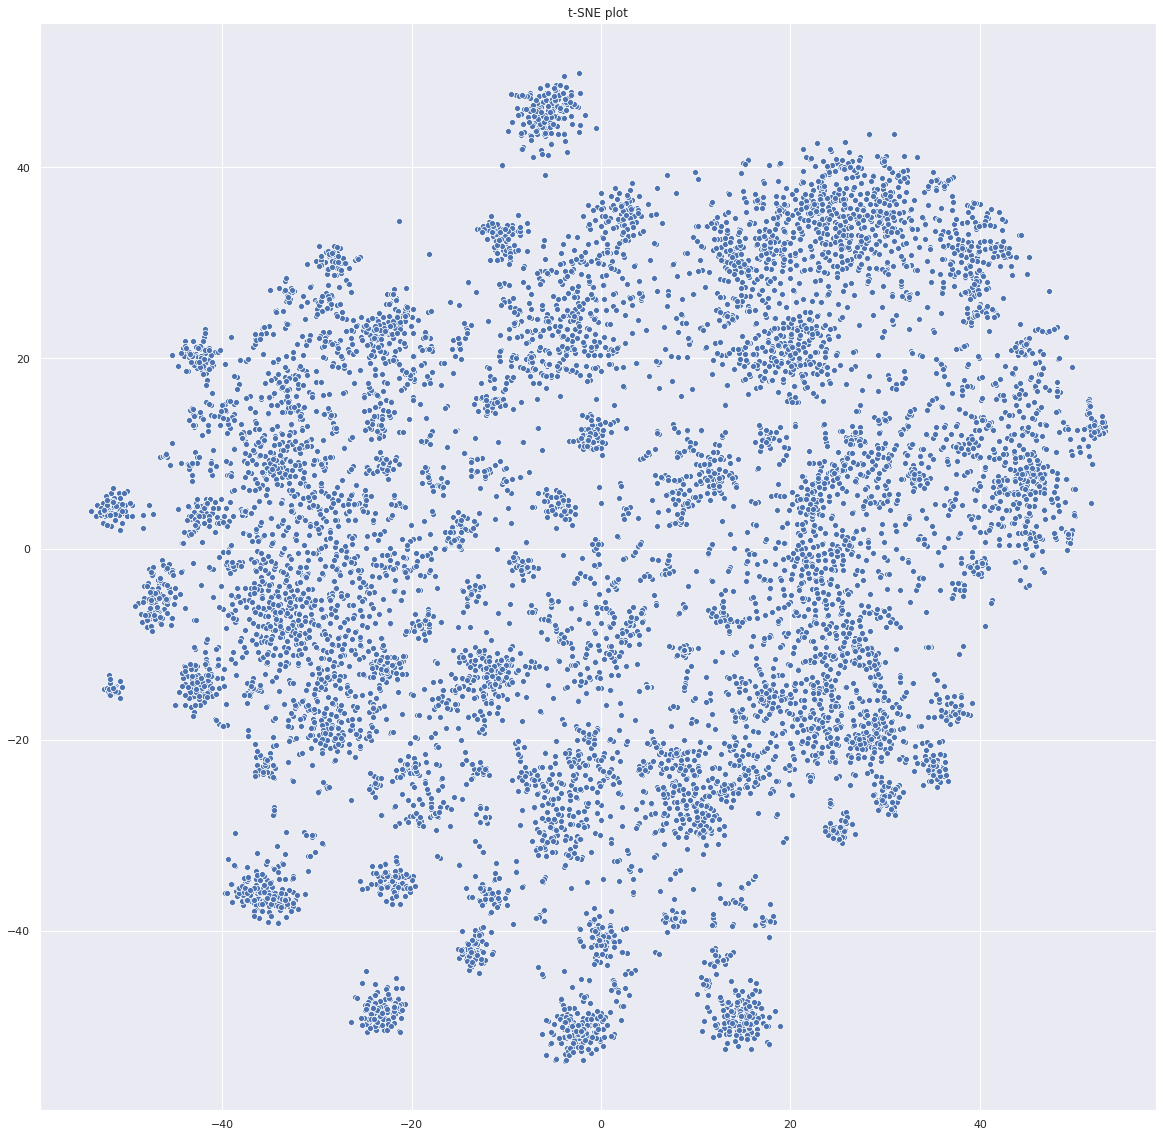

In [17]:
# sns settings
sns.set(rc={'figure.figsize':(20, 20)})
sns.scatterplot(X_TSNE[:,0], X_TSNE[:,1])

plt.title('t-SNE plot')
plt.show()

# BIRCH Clustering

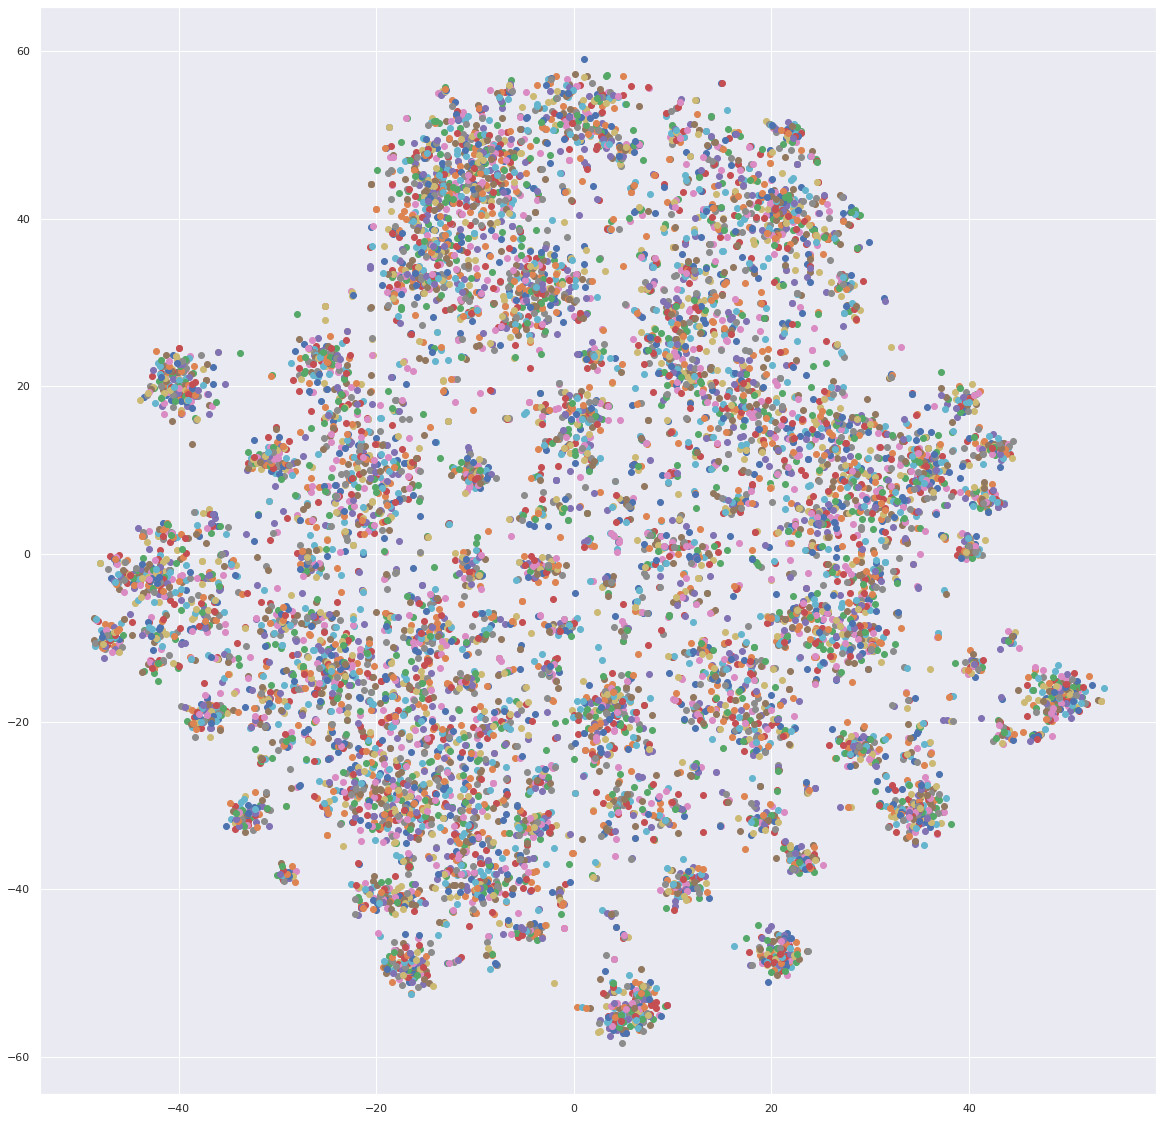

In [8]:
# define the model
model = Birch(threshold=0.01, n_clusters=None)
# fit the model
model.fit(X_TSNE)
# assign a cluster to each example
labels = model.predict(X_TSNE)
# filter duplicate labels
clusters = unique(labels)
# create scatter plot 
plt.figure(figsize=(20, 20))
for cluster in clusters:
	# get row indices for samples within cluster
	row_ix = where(labels == cluster)
	# create scatter of these samples
	plt.scatter(X_TSNE[row_ix, 0], X_TSNE[row_ix, 1], cmap="Set2")
# show the plot
plt.show()


# Performance Metric
The performance of BIRCH clustering against other algorithms is measured using the following two metric :
### 1. Silhouette Score

In [16]:
metrics.silhouette_score(X_TSNE, labels)

0.008568307

### 2. Calinski Harabasz Score

In [13]:
metrics.calinski_harabasz_score(X_TSNE, labels)

126824.83074997191